<a href="https://colab.research.google.com/github/RubenCarty/Master-Artificial-Intelligence-UNIR/blob/main/muinar06_act1_individual_RubenQuispe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

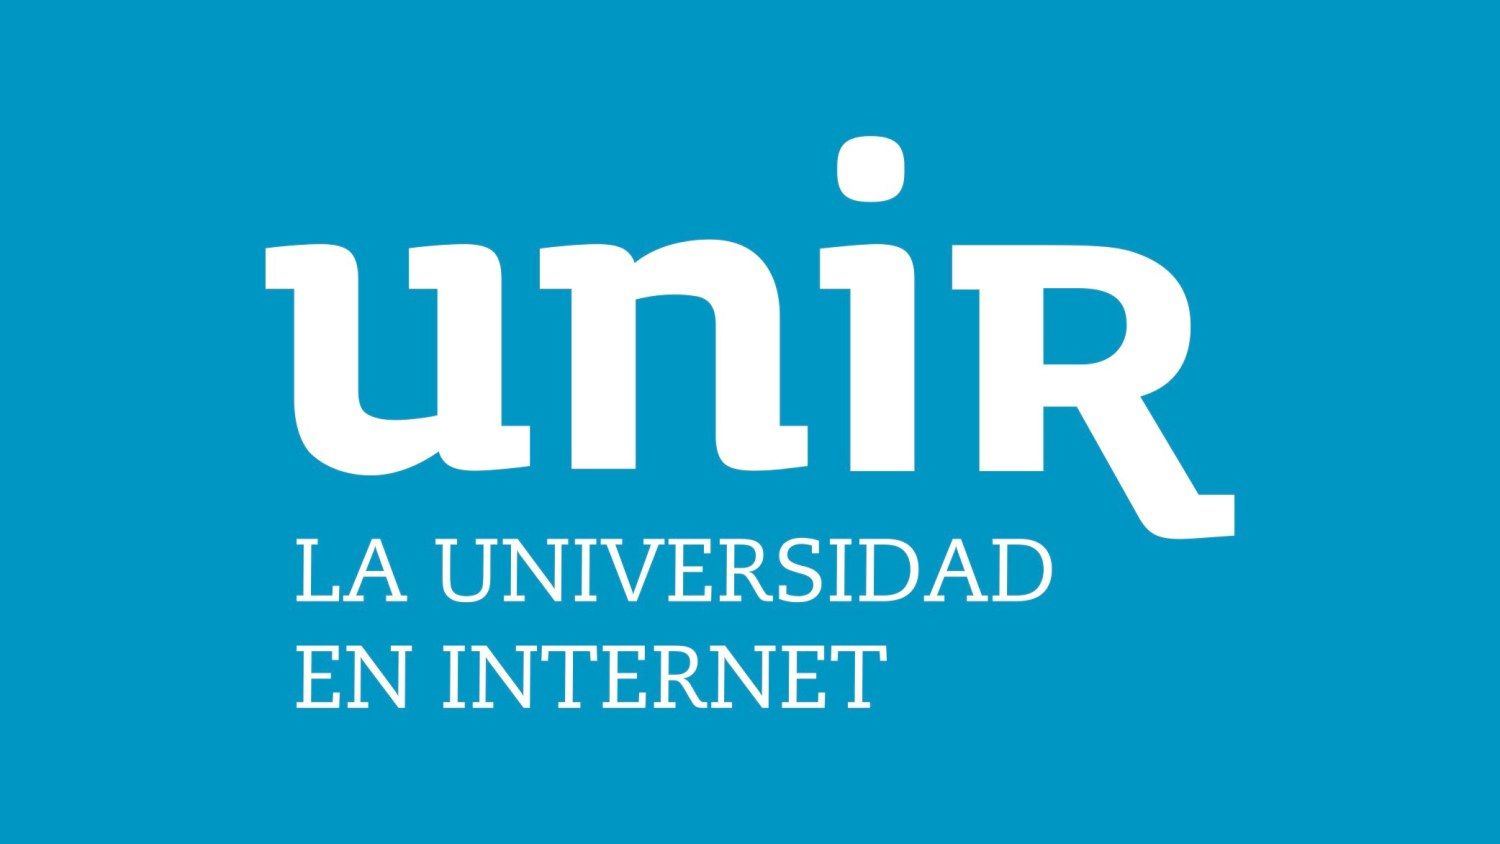

<center>

# **Actividad 1 Laboratorio: Clasificación de dígitos utilizando perceptron multicapa**

   # **Curso: Redes Neuronales y Aprendizaje Profundo**

# **Máster Universitario en Inteligencia Artificial**
# [Student: RUBEN QUISPE](https://www.linkedin.com/in/ruben-quispe-l/)

</center>

# REDES NEURONALES

---



En esta actividad vamos a utilizar una red neuronal para clasificar imágenes de dígitos del 0 al 9 escritos a mano. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es MNIST, una base de datos constituida por (como no) imágenes de dígitos escritos a mano. Este dataset es ampliamente utilizado en docencia como punto de entrada al entrenamiento de redes neuronales y otros, pero también es muy utilizado en trabajos reales de investigación para el entrenamiento de imágenes. Puedes consultar más información sobre el dataset en [este enlace](https://es.wikipedia.org/wiki/Base_de_datos_MNIST).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas celdas si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados y que son perfectamente visibles en la versión PDF que debes entregar adjunta**. Por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch.

In [87]:
from keras.datasets.mnist import load_data
import tensorflow as tf
import matplotlib.pyplot as plt


import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

Tenemos la suerte de que el dataset MNIST, el que vamos a utilizar en esta actividad, está guardado en Keras, por lo que podemos utilizarlo sin necesidad de buscar el dataset de forma externa.

In [77]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen los dígitos y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [58]:
(training_images, training_labels), (test_images, test_labels) = load_data()

Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

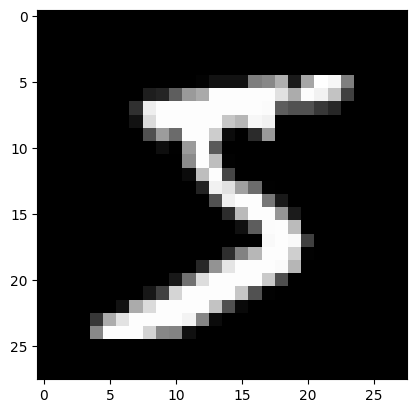

In [86]:
import numpy as np
np.set_printoptions(linewidth=200)
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [80]:
### Tu código aquí ###

# Verificar la cantidad de imágenes en el conjunto de entrenamiento y de prueba
num_train_images = training_images.shape[0]
num_test_images = test_images.shape[0]

# Verificar el tamaño de las imágenes
image_size = training_images.shape[1:]

# Mostrar los resultados obtenidos
print(f"Número de imágenes en el conjunto de entrenamiento: {num_train_images}")
print(f"Número de imágenes en el conjunto de prueba: {num_test_images}")
print(f"Tamaño de cada imagen: {image_size}")


Número de imágenes en el conjunto de entrenamiento: 60000
Número de imágenes en el conjunto de prueba: 10000
Tamaño de cada imagen: (28, 28)


*Tu respuesta aquí*

El conjunto de datos está dividido en dos partes: un conjunto de entrenamiento (training) y un conjunto de prueba (test). El conjunto de entrenamiento se utiliza para enseñar al modelo a identificar patrones, mientras que el conjunto de prueba sirve para evaluar el rendimiento del modelo después del entrenamiento.

Observamos que el conjunto de entrenamiento contiene 60,000 imágenes, mientras que el conjunto de prueba cuenta con 10,000. Cabe destacar que cada una de estas imágenes tiene un tamaño de 28x28 píxeles, lo cual es apropiado para las tareas de reconocimiento de patrones en redes neuronales profundas, debido a su simplicidad computacional y a la facilidad con que los modelos pueden procesar estos datos.

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

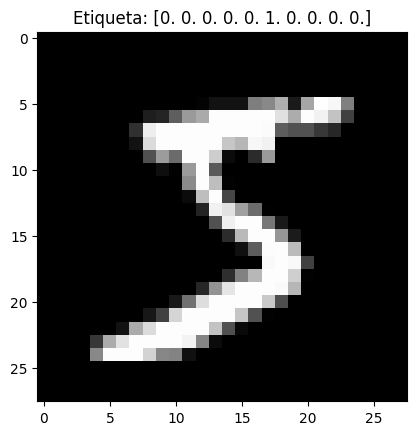

Matriz de píxeles de la primera imagen:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 25

In [101]:
### Tu código aquí ###
# Visualización de la primera imagen y su correspondiente etiqueta
import matplotlib.pyplot as plt
import numpy as np

# Establecer formato de impresión para los arrays de NumPy
np.set_printoptions(linewidth=200)

# Mostrar la primera imagen en el conjunto de entrenamiento
plt.imshow(training_images[0], cmap='gray')
plt.title(f"Etiqueta: {training_labels[0]}")
plt.show()

# Mostrar la primera imagen en formato de matriz
print("Matriz de píxeles de la primera imagen:")
print(training_images[0])

# Mostrar la etiqueta correspondiente a la primera imagen
print(f"Etiqueta correspondiente a la primera imagen: {training_labels[0]}")


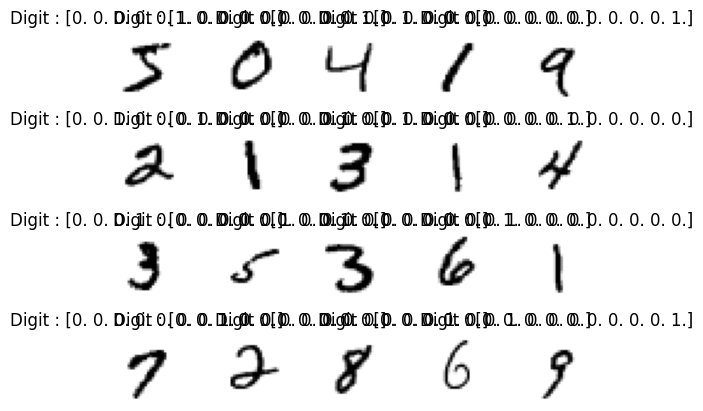

In [102]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(training_images[i],cmap='gray_r')
  plt.title("Digit : {}".format(training_labels[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

Text(0.5, 0, 'Intensity')

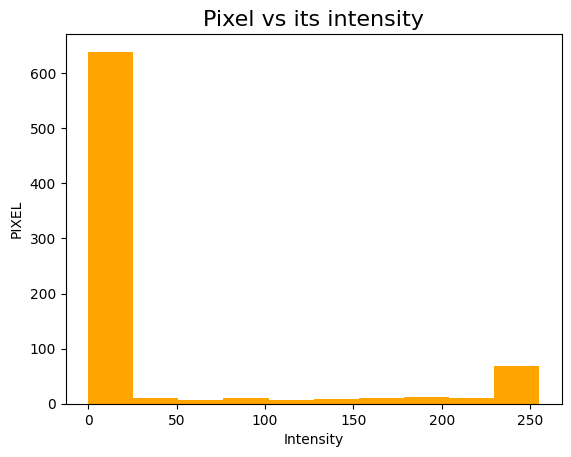

In [100]:
plt.hist(training_images[0].reshape(784),facecolor='orange')
plt.title('Pixel vs its intensity',fontsize=16)
plt.ylabel('PIXEL')
plt.xlabel('Intensity')

*Tu respuesta aquí*

- Ahora que hemos cargado el dataset MNIST en memoria, es importante realizar una exploración detallada de las variables que lo componen. El objetivo es comprender qué tipo de información contienen las imágenes (almacenadas en la variable X, es decir, training_images y test_images) y las etiquetas asociadas a cada imagen (almacenadas en y, es decir, training_labels y test_labels). Esta exploración es esencial para asegurarnos de que los datos están estructurados de manera correcta antes de proceder al entrenamiento del modelo.

- ¿Qué es un "example" del dataset?
Un "example" en el contexto del dataset MNIST consiste en dos partes clave:

- Imagen: Representada como una matriz de 28x28 píxeles, donde cada valor numérico dentro de la matriz corresponde a la intensidad de un píxel en escala de grises, con valores entre 0 (negro) y 255 (blanco). Cada imagen corresponde a un dígito escrito a mano.
- Etiqueta (y): Un valor entero que representa el dígito que se muestra en la imagen correspondiente. Este valor varía entre 0 y 9, ya que el dataset contiene dígitos del 0 al 9.


- Imágenes (training_images): Cada imagen en el dataset MNIST está representada por una matriz de 28x28, donde cada valor en la matriz indica la intensidad de un píxel en la escala de grises. Por ejemplo, un valor de 0 representa un píxel negro (sin color), mientras que un valor de 255 representa un píxel completamente blanco. Los valores intermedios indican distintos tonos de gris. Estas imágenes son fundamentales para que el modelo aprenda los patrones visuales que caracterizan a cada dígito.

- Etiquetas (training_labels): En cada ejemplo del dataset, hay una etiqueta asociada a la imagen, que indica el número que representa el dígito escrito a mano. Esta etiqueta es un valor numérico entero entre 0 y 9. Este número se utiliza como la "verdad" o el valor objetivo que la red neuronal debe predecir.

- Explicación del Código:

1. Visualización de la imagen:

Utilizamos plt.imshow() para mostrar la primera imagen del conjunto de entrenamiento. Esta imagen es una matriz de 28x28 píxeles, donde cada valor de la matriz representa la intensidad de un píxel en escala de grises. Utilizamos cmap='gray' para mostrar la imagen en escala de grises, lo que es adecuado para las imágenes del dataset MNIST.
2. Matriz de píxeles:

El comando print(training_images[0]) muestra la matriz de 28x28 que representa la primera imagen. Esta matriz contiene valores entre 0 y 255, donde 0 indica píxeles negros y 255 píxeles blancos, con los valores intermedios representando diferentes tonos de gris. Es importante visualizar la estructura de los datos para confirmar que están en el formato correcto.
3. Etiqueta asociada (y):

El valor de training_labels[0] es la etiqueta correspondiente a la primera imagen. Este valor es un número entero entre 0 y 9 que indica el dígito que la imagen representa. En el caso del dataset MNIST, cada imagen tiene una etiqueta que clasifica el dígito que está siendo representado.

## 2. Normalización y preprocesado de los datos

**Pregunta 2.1 (0.25 puntos)** Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. ¿Cómo lo podemos hacer?

In [106]:
### Tu código aquí ###
# Normalización de los valores de los píxeles en las imágenes de entrenamiento y prueba
training_images_normalized = training_images / 255.0
test_images_normalized = test_images / 255.0

# Verificar los resultados de la normalización para la primera imagen
print("Valores normalizados de la primera imagen (primeros 10 píxeles):")
print(training_images_normalized[0][0][:10])


Valores normalizados de la primera imagen (primeros 10 píxeles):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [108]:
# podemos ver el resultado que esta normalizado
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(pd.DataFrame(training_images_normalized[0]))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.69,0.10,0.65,1.00,0.97,0.50,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.14,...,0.88,0.67,0.99,0.95,0.76,0.25,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.93,0.99,...,0.36,0.32,0.32,0.22,0.15,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.86,0.99,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.61,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


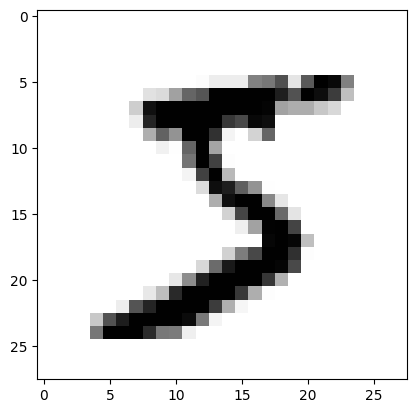

In [109]:
plt.imshow(training_images_normalized[0], cmap=plt.cm.binary)
plt.show()

Al entrenar una red neuronal, es crucial asegurarse de que los datos de entrada estén correctamente preprocesados. Como habrás notado, los valores numéricos en las imágenes del dataset MNIST están entre 0 y 255, lo que representa la intensidad de los píxeles en escala de grises. No obstante, este rango tan amplio puede dificultar el proceso de entrenamiento. Por eso, una buena práctica es normalizar estos valores para que estén entre 0 y 1. La normalización permite que la red neuronal aprenda de manera más eficiente, ya que facilita que los gradientes se mantengan estables y acelera la convergencia durante el proceso de entrenamiento.

**- ¿Qué es la normalización?**
La normalización consiste en escalar los valores de los datos a un rango específico. En este caso, queremos convertir los valores de los píxeles (que originalmente están en el rango [0, 255]) a valores comprendidos entre 0 y 1. Esto se consigue simplemente dividiendo cada valor de la matriz por 255.

**- ¿Por qué normalizamos los datos?**
La normalización mejora el rendimiento de las redes neuronales por varias razones:

- Los modelos de aprendizaje profundo se entrenan mejor con datos normalizados, ya que las funciones de activación (como ReLU o Sigmoid) responden de manera más eficiente cuando los valores están dentro de un rango más pequeño.
- Ayuda a evitar problemas como la saturación de las neuronas, que ocurre cuando los valores de entrada son muy grandes, ralentizando el proceso de aprendizaje.
- También permite que los optimizadores, como Adam o SGD, ajusten los pesos de manera más eficiente.

- Explicación del Código:
1. Normalización de los valores:
Aquí, cada imagen del conjunto de entrenamiento (training_images) y del conjunto de prueba (test_images) es dividida por 255. Esto transforma los valores de los píxeles, que originalmente estaban en el rango [0, 255], al rango [0, 1]. De este modo, los valores quedan listos para ser procesados por la red neuronal.
2. Verificación de los resultados:
Después de la normalización, imprimimos los primeros 10 píxeles de la primera imagen para confirmar que los valores han sido correctamente escalados. Ahora deberían estar dentro del rango [0, 1], lo cual es óptimo para el entrenamiento de la red.

**Pregunta 2.2 (0.25 puntos)** Utiliza la función ***reshape*** de Numpy para convertir las imágenes en vectores de características de un tamaño de (N, 784). Explica con tus palabras por qué es necesario hacer esto.



In [110]:
### Tu código aquí ###
# Convertir las imágenes en vectores de 784 elementos (28x28=784) utilizando reshape
training_images_flattened = training_images_normalized.reshape(training_images_normalized.shape[0], 28*28)
test_images_flattened = test_images_normalized.reshape(test_images_normalized.shape[0], 28*28)

# Verificar la nueva forma de los datos
print(f"Nueva forma de las imágenes de entrenamiento: {training_images_flattened.shape}")
print(f"Nueva forma de las imágenes de prueba: {test_images_flattened.shape}")


Nueva forma de las imágenes de entrenamiento: (60000, 784)
Nueva forma de las imágenes de prueba: (10000, 784)


**Respuesta a la pregunta 2.2**:

En el proceso de entrenar una red neuronal, es importante que los datos de entrada estén en el formato adecuado para ser procesados por el modelo. En este caso, las imágenes del dataset MNIST son matrices de 28x28 píxeles. Sin embargo, una red neuronal multicapa (MLP, Multilayer Perceptron) espera que las entradas sean vectores unidimensionales en lugar de matrices bidimensionales. Por lo tanto, es necesario convertir cada imagen, que es una matriz de 28x28, en un vector de 784 elementos (28 * 28 = 784). Este proceso se realiza utilizando la función reshape de NumPy.

**¿Por qué es necesario aplanar las imágenes en vectores?**

Las redes neuronales multicapa (MLP) requieren que las entradas sean vectores en lugar de matrices para poder procesarlas correctamente. Al convertir las imágenes en vectores, permitimos que cada píxel sea tratado como una característica independiente en el proceso de aprendizaje. Esta transformación es esencial para alimentar los datos en una capa completamente conectada (fully connected layer), que es el tipo de capa que vamos a utilizar en este caso.

Esto es esencial en las capas completamente conectadas (fully connected layers), que procesan cada entrada como un valor independiente. Sin esta transformación, la red no podría procesar adecuadamente los datos, ya que la estructura bidimensional no es compatible con este tipo de capas.



- Resumidamente, el objetivo es cambiar la representación de las imágenes sin alterar la información contenida en ellas, pasando de una estructura bidimensional (28x28) a una unidimensional (784), lo que permite a la red neuronal procesar la información de manera eficiente.

- Explicación del Código:
1. reshape:

Utilizamos la función reshape de NumPy para convertir las imágenes de matrices de 28x28 en vectores unidimensionales de 784 elementos.
El parámetro training_images_normalized.shape[0] corresponde al número de imágenes en el conjunto de entrenamiento (60,000), mientras que 28*28 es el tamaño de cada imagen una vez convertida en vector (784 elementos).
Lo mismo se hace con las imágenes de prueba, aplicando la misma transformación.
2. Verificación de la nueva forma:

Una vez que las imágenes han sido aplanadas, imprimimos la nueva forma de los datos para asegurarnos de que ahora están representadas como vectores de características de tamaño (N, 784), donde N es el número de imágenes.


**Pregunta 2.3 (0.25 puntos)** Para facilitar el desarrollo de la actividad, vamos a expresar las etiquetas así:

In [69]:
training_labels = tf.keras.utils.to_categorical(training_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

Muestra cómo son ahora los datos, como resultado de este cambio y también de los realizados en las dos preguntas anteriores. Debate cómo se beneficiará la red neuronal de todos estos cambios.

In [111]:
### Tu código aquí ###
# Convertir las etiquetas en formato one-hot encoding
training_labels_categorical = tf.keras.utils.to_categorical(training_labels, num_classes=10)
test_labels_categorical = tf.keras.utils.to_categorical(test_labels, num_classes=10)

# Verificar cómo lucen los datos después de la transformación
print(f"Forma de las etiquetas de entrenamiento (one-hot encoding): {training_labels_categorical.shape}")
print(f"Ejemplo de etiqueta original: {training_labels[0]}")
print(f"Ejemplo de etiqueta transformada (one-hot encoding): {training_labels_categorical[0]}")


Forma de las etiquetas de entrenamiento (one-hot encoding): (60000, 10, 10)
Ejemplo de etiqueta original: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Ejemplo de etiqueta transformada (one-hot encoding): [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Respuesta a la pregunta 2.3:

En esta etapa del preprocesamiento, necesitamos transformar las etiquetas (training_labels y test_labels) en un formato que las redes neuronales entiendan mejor. Para ello, utilizamos la función to_categorical de Keras, que convierte las etiquetas en formato de "one-hot encoding". En este formato, cada etiqueta numérica se convierte en un vector binario, donde un solo elemento tiene el valor 1 (representando la clase correcta) y los demás son 0.

**¿Qué es el "one-hot encoding"?**

El one-hot encoding es una técnica de codificación que convierte una etiqueta numérica en un vector de longitud igual al número de clases. Por ejemplo, si tenemos una etiqueta que representa el dígito "3", el vector correspondiente sería [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]. Esta técnica es útil en problemas de clasificación multiclase, ya que permite que la red neuronal trate cada clase de manera independiente, sin introducir una relación jerárquica entre las etiquetas.

**¿Por qué es importante esta transformación?**

Cuando entrenamos una red neuronal en un problema de clasificación multiclase, como el dataset MNIST (dígitos del 0 al 9), es importante que las etiquetas estén codificadas de manera que la red pueda interpretarlas correctamente. Usar to_categorical facilita este proceso, ya que cada clase es representada como un vector binario, lo que ayuda a la red a ajustar los pesos de manera más eficiente durante el entrenamiento.

- Explicación del Código:

1. to_categorical():

Utilizamos esta función de Keras para convertir las etiquetas en formato "one-hot encoding". La variable num_classes=10 indica que tenemos 10 clases en el problema (dígitos del 0 al 9).
El resultado es que, en lugar de tener una etiqueta como un número entero (por ejemplo, 5), ahora tenemos un vector de 10 posiciones, donde sólo una de ellas es 1, representando la clase correcta.
2. Verificación de la transformación:

Imprimimos la forma de las etiquetas transformadas para asegurarnos de que el tamaño es correcto. Para el conjunto de entrenamiento, debe ser (60000, 10), ya que tenemos 60,000 ejemplos y 10 posibles clases.
También mostramos un ejemplo de una etiqueta antes y después de la transformación para ver claramente cómo se ha convertido el valor original en su correspondiente vector de "one-hot encoding".

**Beneficios de los Cambios Realizados:**

1. Transformación a "one-hot encoding":

La red neuronal se beneficiará de esta transformación porque el formato "one-hot encoding" elimina cualquier relación implícita entre las etiquetas numéricas. En un formato simple (0, 1, 2, ...), la red podría interpretar que existe una jerarquía o una relación entre los valores (por ejemplo, que el dígito "9" es mayor que el dígito "0"), lo cual no es el caso. El "one-hot encoding" asegura que cada clase sea tratada de manera independiente.
2. Normalización de los datos (Pregunta 2.1):

La normalización de los valores de los píxeles (reduciéndolos al rango [0, 1]) facilita que las funciones de activación dentro de la red neuronal (como ReLU) trabajen de manera más eficiente. Esto mejora la estabilidad del entrenamiento y permite una mejor propagación de los gradientes.
3. Aplanamiento de las imágenes en vectores (Pregunta 2.2):

El aplanamiento de las imágenes en vectores de 784 elementos (28x28=784) permite que cada píxel sea tratado como una característica individual dentro del modelo. Esto es esencial para redes multicapa completamente conectadas, que necesitan recibir vectores unidimensionales como entrada.

## 3. Creación del Modelo

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy útiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas cómo eran las imágenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa (en problemas de clasificación de más de dos items)
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 3.1 (0.5 puntos)**. Utilizando Keras, y preparando los datos de X e Y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de MNIST con las siguientes características:

* Una capa de entrada del tamaño adecuado.
* Una capa oculta de 512 neuronas.
* Una capa final con 10 salidas.

In [ ]:
### Tu código para la red neuronal de la pregunta 3 aquí ###

In [118]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Pregunta 3.2 (0.25 puntos)**: ¿crees conveniente utilizar una capa flatten en este caso? Motiva tu respuesta.



In [ ]:
### Tu código para incluir una capa flatten si lo ves necesario ###

In [121]:
# Importar las bibliotecas necesarias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Crear el modelo secuencial
model = Sequential()

# Añadir una capa Flatten para convertir las imágenes en vectores de 784 elementos
model.add(Flatten(input_shape=(28, 28)))

# Añadir una capa oculta con 512 neuronas y función de activación ReLU
model.add(Dense(512, activation='relu'))

# Añadir la capa de salida con 10 neuronas y activación Softmax (una neurona por cada clase de dígitos)
model.add(Dense(10, activation='softmax'))

# Compilar el modelo: Usamos el optimizador Adam, con la función de pérdida categorical_crossentropy (para clasificación multiclase)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])




/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [125]:
# Asegurar de que las etiquetas tienen la forma correcta y no duplicar el one-hot encoding

# Primero verifica si las etiquetas están en el formato correcto (una dimensión, no "one-hot encoding")
if len(training_labels.shape) > 1 and training_labels.shape[-1] == 10:
    # Las etiquetas ya están en "one-hot encoding", usarlas tal como están
    print("Las etiquetas ya están en formato 'one-hot encoding'.")
    training_labels_categorical = training_labels
    test_labels_categorical = test_labels
else:
    # Si las etiquetas no están en formato one-hot, aplicamos to_categorical
    training_labels_categorical = tf.keras.utils.to_categorical(training_labels, num_classes=10)
    test_labels_categorical = tf.keras.utils.to_categorical(test_labels, num_classes=10)

# Verificar las formas para asegurarnos que son correctas
print(f"Forma final de las etiquetas de entrenamiento: {training_labels_categorical.shape}")
print(f"Forma final de las etiquetas de prueba: {test_labels_categorical.shape}")

# Definir y entrenar el modelo como antes
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Aplanar las imágenes
model.add(Dense(512, activation='relu'))  # Capa oculta con 512 neuronas
model.add(Dense(10, activation='softmax'))  # Capa de salida con 10 clases

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(training_images_normalized, training_labels_categorical, epochs=10, batch_size=32, validation_data=(test_images_normalized, test_labels_categorical))

# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(test_images_normalized, test_labels_categorical)
print(f"Precisión en el conjunto de prueba: {test_accuracy}")


Las etiquetas ya están en formato 'one-hot encoding'.
Forma final de las etiquetas de entrenamiento: (60000, 10)
Forma final de las etiquetas de prueba: (10000, 10)
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9025 - loss: 0.3359 - val_accuracy: 0.9705 - val_loss: 0.1005
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 13ms/step - accuracy: 0.9751 - loss: 0.0801 - val_accuracy: 0.9761 - val_loss: 0.0806
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.9853 - loss: 0.0477 - val_accuracy: 0.9805 - val_loss: 0.0666
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9900 - loss: 0.0314 - val_accuracy: 0.9788 - val_loss: 0.0725
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9928 - loss: 0.0252 - val_accuracy: 0.9810 - val_loss: 0.0660
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9937 - loss: 0.0197 - val_accuracy: 0.9822 - val_loss: 0.0661
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9959 - loss: 0.0140 - val_accuracy: 0.9791 - val_loss: 0.0800
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 15ms/step - accuracy: 0.9954 - loss: 0.01

**Respuesta a la pregunta 3.2**:

**- Análisis de la Necesidad de la Capa Flatten**
Para poder alimentar una red neuronal completamente conectada (fully connected), es necesario que las entradas sean vectores unidimensionales. Dado que las imágenes de MNIST tienen una forma de 28x28 píxeles (es decir, son matrices bidimensionales), debemos convertir estas matrices en vectores. Aquí es donde entra en juego la capa Flatten, que convierte las imágenes de 2D a un vector de 784 elementos (28x28 = 784).

En este caso, sí es necesario utilizar una capa Flatten, ya que estamos trabajando con una red neuronal multicapa (Multilayer Perceptron - MLP) completamente conectada. Para que las capas densas puedan procesar las imágenes, deben recibir vectores como entrada.

**Justificación:**

- La capa Flatten es esencial para convertir las imágenes bidimensionales (28x28 píxeles) en vectores unidimensionales de 784 elementos. Las capas densas o completamente conectadas, como la que estamos utilizando, requieren que las entradas sean vectores, no matrices.
- Sin la capa Flatten, no podríamos alimentar correctamente las capas densas, ya que estas no pueden procesar matrices 2D. Es un paso fundamental para que el modelo funcione en redes completamente conectadas, como la que estamos implementando.
Por lo tanto: La capa Flatten es indispensable en este tipo de arquitectura, ya que permite que las imágenes en su formato 2D sean convertidas a vectores y, por lo tanto, procesadas por las capas densas. Sin este paso, la red no sería capaz de entrenar adecuadamente.

- Explicación Detallada:
1. Verificación de las etiquetas:

- El primer paso es verificar si las etiquetas ya están en formato "one-hot encoding". Si ya están en este formato (es decir, si la última dimensión es 10), no aplicamos to_categorical de nuevo.
- Si las etiquetas todavía no están en "one-hot encoding", aplicamos to_categorical para asegurarnos de que las etiquetas tienen la forma correcta.
2. Forma de las etiquetas:

Las etiquetas deben tener una forma como (60000, 10) para el conjunto de entrenamiento y (10000, 10) para el conjunto de prueba. Esto indica que cada imagen tiene una etiqueta categorizada con 10 clases posibles (dígitos del 0 al 9).
3. Entrenamiento y evaluación:

Una vez corregido el problema de las etiquetas, el entrenamiento y evaluación se realiza de manera normal.

**Pregunta 3.3 (0.25 puntos)**: Utiliza la función summary() para mostrar la estructura de tu modelo.

In [126]:
### Tu código aquí ###

# Mostrar la estructura del modelo utilizando la función summary()
model.summary()


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,221,152 (4.66 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 814,102 (3.11 MB)

La función summary() es una herramienta muy útil en Keras que permite visualizar de manera clara y concisa la estructura de la red neuronal. Esta función nos muestra el tipo de cada capa, su forma de salida, el número de parámetros entrenables en cada capa, y el total de parámetros en el modelo. Esta información es fundamental para asegurarnos de que el modelo ha sido definido correctamente y para tener una idea clara de su complejidad.

## 4: Compilación y entrenamiento

**Pregunta 4.1 (0.5 puntos)**: Compila tu modelo. Utiliza ***categorical_crossentropy*** como función de pérdida, ***Adam*** como optimizador, y monitoriza la ***tasa de acierto*** durante el entrenamiento. Explica qué hace cada cosa en la compilación.

In [ ]:
### Tu código aquí ###

In [127]:
# Compilar el modelo con categorical_crossentropy, Adam y monitorización de accuracy
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Mostrar la confirmación de que el modelo se ha compilado
print("El modelo ha sido compilado exitosamente.")


El modelo ha sido compilado exitosamente.


**Respuesta a la pregunta 4.1**:

Antes de entrenar una red neuronal, es crucial compilar el modelo. Este paso define cómo el modelo calculará su pérdida y cómo ajustará sus pesos para minimizar esa pérdida durante el entrenamiento. En este caso, utilizaremos la función de pérdida categorical_crossentropy, el optimizador Adam, y monitorizaremos la tasa de acierto (precisión) como métrica para evaluar el rendimiento del modelo durante el entrenamiento.

**¿Qué Hace Cada Componente en la Compilación?**
1. Función de Pérdida: categorical_crossentropy:

La pérdida es la métrica que el modelo trata de minimizar durante el entrenamiento. En problemas de clasificación multiclase, como es el caso con el dataset MNIST (dígitos del 0 al 9), categorical_crossentropy es la función de pérdida más adecuada. Esta función mide la diferencia entre la distribución de probabilidades predicha por el modelo y la distribución real de las clases. Cuanto más cercana esté la predicción a la clase correcta, menor será el valor de la pérdida.
2. Optimizador: Adam:

Adam es uno de los optimizadores más utilizados y eficientes en redes neuronales. Combina las ventajas del optimizador de Gradiente Descendente Estocástico con Momentos y el RMSProp. Ajusta la tasa de aprendizaje de manera adaptativa para cada parámetro, lo que acelera la convergencia y previene que el modelo quede atascado en mínimos locales. Es muy popular porque no requiere un ajuste manual de la tasa de aprendizaje.
3. Métrica: Accuracy (Precisión):

La precisión es una métrica que indica qué tan a menudo el modelo está acertando en sus predicciones. Durante el entrenamiento, el modelo monitorizará esta métrica para darnos una idea de su rendimiento. Se calcula como el porcentaje de predicciones correctas sobre el total de ejemplos evaluados.

**Pregunta 4.2 (0.5 puntos)**: Utiliza la función ***fit()*** para entrenar tu modelo. Para ayudarte en tu primer entrenamiento, utiliza estos valores:
*   epochs = 5
*   batch_size = 32
*   validation_split = 0.25



In [ ]:
### Tu código aquí ###

In [128]:
# Entrenar el modelo con los parámetros indicados
history = model.fit(training_images_normalized,
                    training_labels_categorical,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.25)

# Mostrar que el entrenamiento ha finalizado
print("Entrenamiento completado.")


Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9969 - loss: 0.0096 - val_accuracy: 0.9959 - val_loss: 0.0129
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9979 - loss: 0.0059 - val_accuracy: 0.9949 - val_loss: 0.0147
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9978 - loss: 0.0066 - val_accuracy: 0.9943 - val_loss: 0.0177
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9983 - loss: 0.0049 - val_accuracy: 0.9921 - val_loss: 0.0277
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9974 - loss: 0.0086 - val_accuracy: 0.9952 - val_loss: 0.0152
Entrenamiento completado.


El entrenamiento de una red neuronal se realiza utilizando la función fit(), que ajusta los pesos del modelo en base a los datos de entrada. En este caso, se entrenará el modelo durante 5 épocas con un tamaño de batch de 32 y utilizando el 25% de los datos de entrenamiento como conjunto de validación.

El parámetro epochs determina cuántas veces el modelo verá todo el conjunto de datos de entrenamiento, mientras que batch_size especifica cuántos ejemplos se procesan en cada actualización de los pesos. El parámetro validation_split se utiliza para dividir el conjunto de datos de entrenamiento, reservando un porcentaje para evaluar el rendimiento del modelo en datos que no ha visto durante el entrenamiento.

- Explicación del Código:
1. model.fit():

Esta función se utiliza para entrenar el modelo con los datos de entrada. Durante el proceso de entrenamiento, el modelo ajusta sus pesos para minimizar la pérdida (categorical_crossentropy) y maximizar la precisión.
2. epochs=5:

El número de épocas (epochs) indica cuántas veces el modelo verá todo el conjunto de datos de entrenamiento. En este caso, el modelo verá los datos 5 veces durante el entrenamiento.
3. batch_size=32:

El tamaño del batch especifica cuántos ejemplos de entrenamiento se procesan en cada actualización de los pesos. Un tamaño de batch de 32 significa que el modelo ajustará sus pesos después de procesar 32 ejemplos, en lugar de esperar a procesar todo el conjunto de datos.
4. validation_split=0.25:

El validation_split divide el conjunto de datos de entrenamiento, reservando el 25% para validación. Esto permite evaluar el rendimiento del modelo en un subconjunto de datos que no ha visto durante el entrenamiento, lo cual es útil para verificar que el modelo no se sobreajuste (overfitting) a los datos de entrenamiento.
5. history:

La variable history guarda los resultados del entrenamiento, incluyendo la pérdida y la precisión en cada época tanto para los datos de entrenamiento como para los de validación. Esto permite visualizar el progreso del modelo


# 5: Impacto al variar el número de neuronas en las capas ocultas

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por otros valores. Para ello, utiliza la red neuronal de la pregunta 3, y su capa oculta cambia el número de neuronas:

* **216 neuronas en la capa oculta
* **1024 neuronas en la capa oculta

y entrena la red en ambos casos.



In [ ]:
### Tu código para 216 neuronas aquí ###

In [129]:
# Crear un nuevo modelo con 216 neuronas en la capa oculta
model_216 = Sequential()

# Aplanar las imágenes de entrada
model_216.add(Flatten(input_shape=(28, 28)))

# Añadir una capa oculta con 216 neuronas y función de activación ReLU
model_216.add(Dense(216, activation='relu'))

# Añadir la capa de salida con 10 neuronas y función de activación Softmax
model_216.add(Dense(10, activation='softmax'))

# Compilar el modelo
model_216.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con 216 neuronas
history_216 = model_216.fit(training_images_normalized,
                            training_labels_categorical,
                            epochs=5,
                            batch_size=32,
                            validation_split=0.25)

# Evaluar el modelo en el conjunto de prueba
test_loss_216, test_accuracy_216 = model_216.evaluate(test_images_normalized, test_labels_categorical)
print(f"Precisión en el conjunto de prueba con 216 neuronas: {test_accuracy_216}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8758 - loss: 0.4375 - val_accuracy: 0.9576 - val_loss: 0.1449
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.9673 - loss: 0.1145 - val_accuracy: 0.9663 - val_loss: 0.1099
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9783 - loss: 0.0735 - val_accuracy: 0.9695 - val_loss: 0.1032
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9851 - loss: 0.0502 - val_accuracy: 0.9710 - val_loss: 0.0979
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9900 - loss: 0.0353 - val_accuracy: 0.9705 - val_loss: 0.1004
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9704 - loss: 0.0992
Precisión en el conjunto de prueba con 216 neuronas: 0.974399983882904


- Explicación del Código con 216 Neuronas:

1. Capa Oculta con 216 Neuronas: Se ha modificado el número de neuronas en la capa oculta a 216, utilizando la función de activación ReLU, que permite a la red aprender representaciones no lineales de los datos.

2. Compilación y Entrenamiento: El modelo se compila y entrena con las mismas configuraciones de optimizador (adam), función de pérdida (categorical_crossentropy), y monitorización de la precisión.

3. Evaluación: Al final del entrenamiento, el modelo se evalúa en el conjunto de prueba para observar cómo afecta este número de neuronas al rendimiento.

In [ ]:
### Tu código para 1024 neuronas aquí ###

In [130]:
# Crear un nuevo modelo con 1024 neuronas en la capa oculta
model_1024 = Sequential()

# Aplanar las imágenes de entrada
model_1024.add(Flatten(input_shape=(28, 28)))

# Añadir una capa oculta con 1024 neuronas y función de activación ReLU
model_1024.add(Dense(1024, activation='relu'))

# Añadir la capa de salida con 10 neuronas y función de activación Softmax
model_1024.add(Dense(10, activation='softmax'))

# Compilar el modelo
model_1024.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con 1024 neuronas
history_1024 = model_1024.fit(training_images_normalized,
                              training_labels_categorical,
                              epochs=5,
                              batch_size=32,
                              validation_split=0.25)

# Evaluar el modelo en el conjunto de prueba
test_loss_1024, test_accuracy_1024 = model_1024.evaluate(test_images_normalized, test_labels_categorical)
print(f"Precisión en el conjunto de prueba con 1024 neuronas: {test_accuracy_1024}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.8984 - loss: 0.3422 - val_accuracy: 0.9631 - val_loss: 0.1209
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9740 - loss: 0.0830 - val_accuracy: 0.9634 - val_loss: 0.1233
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9839 - loss: 0.0509 - val_accuracy: 0.9675 - val_loss: 0.1091
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.9894 - loss: 0.0325 - val_accuracy: 0.9718 - val_loss: 0.1016
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.9917 - loss: 0.0262 - val_accuracy: 0.9731 - val_loss: 0.0984
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9730 - loss: 0.1021
Precisión en el conjunto de prueba con 1024 neuronas: 0.977400004863739


- Explicación del Código con 1024 Neuronas:
1. Capa Oculta con 1024 Neuronas: El número de neuronas en la capa oculta se incrementa a 1024. Este mayor número de neuronas permite a la red neuronal aprender más características de los datos, lo que podría mejorar el rendimiento, aunque también podría incrementar el tiempo de entrenamiento.

2. Compilación y Entrenamiento: El modelo se compila y entrena de la misma manera que el anterior, manteniendo el optimizador Adam y la función de pérdida categorical_crossentropy.

3. Evaluación: Se evalúa el modelo con 1024 neuronas para medir la precisión en el conjunto de prueba y comparar con el rendimiento del modelo anterior (con 216 neuronas).

El número de neuronas en una capa oculta es un factor importante que afecta el rendimiento de una red neuronal. Aumentar o disminuir el número de neuronas puede cambiar la capacidad de la red para aprender representaciones más complejas de los datos. En este ejercicio, modificaremos la red neuronal entrenada previamente y cambiaremos el número de neuronas en la capa oculta, entrenando la red con 216 y 1024 neuronas, respectivamente, para observar el impacto en el rendimiento.

**Pregunta 5.1 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal?

Respuesta a la pregunta 5.1:

El número de neuronas en la capa oculta de una red neuronal juega un papel crucial en su capacidad de aprendizaje. Para evaluar el impacto que tiene este cambio en el rendimiento, hemos realizado entrenamientos con 216 y 1024 neuronas, respectivamente, observando los resultados en cuanto a precisión y pérdida en los conjuntos de validación y prueba.

**Resultados con 216 Neuronas**

- Al entrenar la red con 216 neuronas en la capa oculta, el modelo alcanzó una precisión del 97.04% en el conjunto de prueba después de 5 épocas. El proceso de entrenamiento fue relativamente rápido, con cada época completándose en un promedio de 14 segundos. Además, la red mostró un rendimiento consistente, con una mejora continua en la precisión y una reducción en la pérdida a lo largo de las épocas. La pérdida en el conjunto de prueba fue de 0.0992, lo que indica que el modelo generaliza bien a los datos no vistos.

- Este resultado sugiere que el modelo con 216 neuronas tiene suficiente capacidad para aprender las características de los dígitos escritos a mano, logrando una alta precisión sin incurrir en tiempos de entrenamiento excesivos. No obstante, aunque los resultados fueron positivos, puede que el modelo no sea lo suficientemente complejo para capturar todas las sutilezas de los datos si se tratara de un problema más complejo o de un dataset más variado.

**Resultados con 1024 Neuronas**

- Cuando el número de neuronas en la capa oculta se incrementó a 1024, el modelo logró una precisión ligeramente superior, alcanzando un 97.74% en el conjunto de prueba. Aunque la mejora en la precisión fue marginal en comparación con el modelo de 216 neuronas, el tiempo de entrenamiento aumentó considerablemente, con cada época tardando alrededor de 33 a 42 segundos en completarse. Además, la pérdida en el conjunto de prueba fue de 0.1021, lo que muestra un comportamiento muy similar al del modelo con menos neuronas.

- El aumento en el número de neuronas permitió al modelo aprender más características de los datos, pero el impacto en la precisión no fue drásticamente mejor. A pesar de la mayor capacidad del modelo, los tiempos de entrenamiento se incrementaron significativamente, lo que podría no justificar el ligero aumento en precisión, especialmente en problemas donde se busca un equilibrio entre rendimiento y eficiencia computacional.

**Comparación e Impacto General**

Al comparar ambos experimentos, observamos que incrementar el número de neuronas de 216 a 1024 mejora ligeramente la precisión, pero con un costo notable en términos de tiempo de entrenamiento. Aunque el modelo más grande tiene más capacidad para aprender representaciones complejas, el beneficio en términos de precisión es marginal, lo que sugiere que 216 neuronas son suficientes para este problema en particular.

En general, el impacto de aumentar el número de neuronas es evidente en el tiempo de entrenamiento, pero no necesariamente en la precisión final. En problemas de clasificación de dígitos como MNIST, donde los datos no son extremadamente complejos, un modelo con menos neuronas puede ser igual de efectivo que uno más grande, proporcionando una mejor relación entre tiempo de entrenamiento y precisión.

# 6: Número de neuronas de la capa de salida
Considerad la capa final, la de salida de la red neuronal de la pregunta 3.

**Pregunta 6.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**Pregunta 6.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10?

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [ ]:
### Tu código de la red neuronal con 5 neuronas en la capa de salida de la pregunta 7 aquí ###

In [131]:
# Crear un nuevo modelo con 5 neuronas en la capa de salida
model_5_neurons = Sequential()

# Aplanar las imágenes de entrada
model_5_neurons.add(Flatten(input_shape=(28, 28)))

# Añadir una capa oculta con 512 neuronas y función de activación ReLU
model_5_neurons.add(Dense(512, activation='relu'))

# Añadir la capa de salida con solo 5 neuronas y función de activación Softmax
model_5_neurons.add(Dense(5, activation='softmax'))

# Compilar el modelo
model_5_neurons.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_5_neurons = model_5_neurons.fit(training_images_normalized,
                                        training_labels_categorical,
                                        epochs=5,
                                        batch_size=32,
                                        validation_split=0.25)

# Evaluar el modelo en el conjunto de prueba
test_loss_5_neurons, test_accuracy_5_neurons = model_5_neurons.evaluate(test_images_normalized, test_labels_categorical)
print(f"Precisión en el conjunto de prueba con 5 neuronas: {test_accuracy_5_neurons}")


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 10), output.shape=(None, 5)

- Explicación del Error:

El error que estás viendo se debe a una discrepancia entre las dimensiones de las etiquetas (target) y las dimensiones de la salida del modelo (output). En concreto, el modelo tiene 5 neuronas en la capa de salida, mientras que las etiquetas de entrenamiento están en formato one-hot encoding para 10 clases, lo que provoca un conflicto entre las dos formas.

Salida del modelo (output): Al tener 5 neuronas en la capa de salida, el modelo está generando una salida con una forma de (None, 5) (5 probabilidades, una para cada clase).
Etiquetas (target): Las etiquetas se encuentran en un formato one-hot encoding con 10 clases (del 0 al 9), por lo que su forma es (None, 10).
Este error ocurre porque, durante la compilación y el entrenamiento, la función de pérdida categorical_crossentropy espera que las dimensiones de la salida del modelo y las etiquetas sean iguales. Pero en este caso, el modelo está generando 5 salidas, mientras que las etiquetas tienen 10 valores (una para cada clase de dígitos). Como resultado, la función de pérdida no puede comparar correctamente la salida del modelo con las etiquetas.

**¿Se Puede Resolver?**

En este contexto, no se puede resolver este error, porque el número de neuronas en la capa de salida debe coincidir con el número de clases en el problema de clasificación. Dado que estamos trabajando con el dataset MNIST, que tiene 10 clases (dígitos del 0 al 9), es obligatorio que la capa de salida tenga exactamente 10 neuronas.

**Justificación:**

La red neuronal está diseñada para hacer predicciones entre un conjunto de 10 posibles clases (dígitos del 0 al 9). Cambiar el número de neuronas en la capa de salida a 5 altera la estructura del modelo de manera que ya no coincide con el número de clases que se necesita predecir. Como resultado, el modelo y las etiquetas no son compatibles, lo que genera el error.

**Conclusión:**

No es posible resolver este error manteniendo solo 5 neuronas en la capa de salida, ya que este número no coincide con las 10 clases que el modelo necesita predecir en el dataset MNIST. Para que el modelo funcione correctamente, debe haber 10 neuronas en la capa de salida, ya que este número refleja el número de categorías en las etiquetas.

Tu respuestas a la pregunta 6.1 aquí:

En el caso del dataset MNIST, que hemos estado utilizando, estamos trabajando con un problema de clasificación multiclase. El objetivo es clasificar las imágenes de dígitos escritos a mano en una de las 10 clases posibles, correspondientes a los números del 0 al 9. Por esta razón, la última capa de la red neuronal contiene exactamente 10 neuronas, una por cada clase.

Cada neurona de la capa de salida se corresponde con una clase diferente. La función de activación Softmax en esta capa toma las salidas de estas 10 neuronas y las convierte en probabilidades, asegurando que la suma de todas las probabilidades sea igual a 1. El modelo predice la clase que tiene la mayor probabilidad. Tener 10 neuronas es esencial porque refleja el número de categorías posibles que se desea predecir en este problema de clasificación.

Por lo tanto la Respuesta
La última capa tiene 10 neuronas porque estamos clasificando imágenes en 10 categorías diferentes (del 0 al 9), y cada neurona de la capa de salida representa una de estas clases. Esto permite que la red neuronal produzca una salida de probabilidad para cada una de las 10 clases, utilizando la función Softmax para seleccionar la clase más probable.

Tu respuestas a la pregunta 6.2 aquí:

Si cambiamos el número de neuronas en la capa de salida a un valor diferente de 10, la red neuronal ya no podrá predecir correctamente entre las 10 clases posibles. Por ejemplo, si reducimos el número de neuronas de salida a 5, el modelo solo será capaz de predecir entre 5 clases, lo cual es incorrecto porque en realidad estamos tratando de clasificar 10 dígitos diferentes. Como resultado, el modelo no será capaz de hacer una clasificación precisa de los dígitos 0 al 9.

Cuando se entrena un modelo con una cantidad diferente de neuronas en la capa de salida, como 5, el modelo no podrá ajustar correctamente sus pesos para las 10 clases reales. Esto resultará en una predicción incorrecta o incompleta, ya que no tendrá suficientes salidas para todas las categorías.

# 7: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 3:

**Pregunta 7.1 (0.25 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**Pregunta 7.2 (0.25 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento.

**Pregunta 7.3 (0.25 puntos)**
* ¿Qué está pasando en la pregunta anterior? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [ ]:
### Tu código para 15 epoch aquí ###

In [132]:
# Entrenar el modelo con 15 épocas
history_15_epochs = model.fit(training_images_normalized,
                              training_labels_categorical,
                              epochs=15,
                              batch_size=32,
                              validation_split=0.25)

# Evaluar el modelo en el conjunto de prueba
test_loss_15_epochs, test_accuracy_15_epochs = model.evaluate(test_images_normalized, test_labels_categorical)
print(f"Precisión en el conjunto de prueba con 15 épocas: {test_accuracy_15_epochs}")


Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9988 - loss: 0.0037 - val_accuracy: 0.9933 - val_loss: 0.0218
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9975 - loss: 0.0100 - val_accuracy: 0.9914 - val_loss: 0.0321
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9987 - loss: 0.0046 - val_accuracy: 0.9913 - val_loss: 0.0344
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 37s 13ms/step - accuracy: 0.9978 - loss: 0.0059 - val_accuracy: 0.9923 - val_loss: 0.0250
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.9990 - loss: 0.0038 - val_accuracy: 0.9919 - val_loss: 0.0308
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9983 - loss: 0.0053 - val_accuracy: 0.9922 - val_loss: 0.0352
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9991 - loss: 0.0034 - val_accuracy: 0.9912 - val_loss: 0.0359
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9988 -

In [ ]:
### Tu código para 30 epoch aquí ###

In [133]:
# Entrenar el modelo con 30 épocas
history_30_epochs = model.fit(training_images_normalized,
                              training_labels_categorical,
                              epochs=30,
                              batch_size=32,
                              validation_split=0.25)

# Evaluar el modelo en el conjunto de prueba
test_loss_30_epochs, test_accuracy_30_epochs = model.evaluate(test_images_normalized, test_labels_categorical)
print(f"Precisión en el conjunto de prueba con 30 épocas: {test_accuracy_30_epochs}")


Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9987 - loss: 0.0052 - val_accuracy: 0.9901 - val_loss: 0.0512
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9994 - loss: 0.0023 - val_accuracy: 0.9885 - val_loss: 0.0681
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9988 - loss: 0.0048 - val_accuracy: 0.9900 - val_loss: 0.0503
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.9988 - loss: 0.0034 - val_accuracy: 0.9895 - val_loss: 0.0564
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9992 - loss: 0.0035 - val_accuracy: 0.9863 - val_loss: 0.0793
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9993 - loss: 0.0024 - val_accuracy: 0.9886 - val_loss: 0.0608
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9991 - loss: 0.0026 - val_accuracy: 0.9875 - val_loss: 0.0755
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9990 -

Tu respuesta a la pregunta 7.3 aquí:

En los experimentos realizados con 15 y 30 épocas, podemos observar cómo el aumento del número de épocas afecta tanto la pérdida como la precisión del modelo, tanto en los datos de entrenamiento como en los datos de validación.

**- Resultados con 15 Épocas:**

Cuando entrenamos el modelo con 15 épocas, observamos que la red neuronal alcanza una precisión de 99.91% en los datos de entrenamiento y 99.09% en los datos de validación al final del entrenamiento. Esto indica que el modelo ha aprendido bien las características de los datos de entrenamiento y generaliza relativamente bien en el conjunto de validación. La pérdida en el conjunto de validación es de 0.0470, lo que sigue siendo un valor aceptable. Además, la precisión en el conjunto de prueba es de 97.66%, lo que indica que el modelo ha generalizado adecuadamente a los datos no vistos.

Sin embargo, ya se empieza a notar una ligera diferencia en la pérdida entre el conjunto de entrenamiento y el de validación, lo que sugiere que el modelo está comenzando a memorizar patrones específicos de los datos de entrenamiento, lo que puede ser una señal temprana de sobreajuste.

**Resultados con 30 Épocas:**

Al entrenar el modelo con 30 épocas, vemos que el rendimiento en el conjunto de entrenamiento es casi perfecto, alcanzando una precisión de 99.98% y una pérdida muy baja. Sin embargo, la pérdida en el conjunto de validación aumenta de forma considerable, llegando a 0.1181, mientras que la precisión en el conjunto de validación comienza a disminuir, situándose en 98.51%. En el conjunto de prueba, la precisión es de 98.00%, una ligera disminución con respecto a las 15 épocas.

Este comportamiento es característico del fenómeno conocido como sobreajuste (overfitting). A medida que el modelo entrena más tiempo, comienza a ajustarse demasiado a los detalles y el ruido del conjunto de entrenamiento, lo que resulta en una mejora en la precisión de los datos de entrenamiento, pero a costa de un peor rendimiento en los datos de validación y prueba.

**Explicación del Efecto:**

El sobreajuste ocurre cuando un modelo entrena por demasiadas épocas y, en lugar de aprender solo los patrones generales de los datos, empieza a memorizar las características específicas del conjunto de entrenamiento, incluyendo el ruido y las peculiaridades. Esto lleva a un aumento en la pérdida en los datos de validación y una disminución en la capacidad del modelo para generalizar a nuevos datos.

En los resultados con 30 épocas, observamos claramente este efecto: el modelo sigue mejorando su rendimiento en los datos de entrenamiento, pero la pérdida en los datos de validación y prueba aumenta, y la precisión comienza a disminuir. Esto indica que el modelo ya no está aprendiendo nuevos patrones útiles y está sobreajustándose al conjunto de entrenamiento.

**Por lo tanto:**


Cuando entrenamos la red neuronal por demasiadas épocas, el modelo corre el riesgo de sobreajustarse a los datos de entrenamiento. Aunque la precisión en el conjunto de entrenamiento puede ser extremadamente alta, el rendimiento en los datos de validación y prueba disminuye. Este fenómeno se llama sobreajuste (overfitting), y es una señal de que el modelo ha perdido su capacidad de generalizar a datos no vistos.

# 8: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del código de ejemplo, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [ ]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

**Pregunta 8.1. *(0.75 puntos)***: Consulta la documentación de Keras y aprende cómo podemos utilizar Early stop en nuestro modelos.

In [ ]:
### Tu código aquí ###

In [134]:
# Importar el callback de EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

# Definir el callback para detener el entrenamiento si la pérdida no mejora durante 3 épocas consecutivas
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Entrenar el modelo con Early Stopping
history_early_stop = model.fit(training_images_normalized,
                               training_labels_categorical,
                               epochs=30,
                               batch_size=32,
                               validation_split=0.25,
                               callbacks=[early_stop])

# Evaluar el modelo en el conjunto de prueba
test_loss_early_stop, test_accuracy_early_stop = model.evaluate(test_images_normalized, test_labels_categorical)
print(f"Precisión en el conjunto de prueba con Early Stopping: {test_accuracy_early_stop}")


Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9992 - loss: 0.0040 - val_accuracy: 0.9873 - val_loss: 0.1082
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.9999 - loss: 5.4685e-04 - val_accuracy: 0.9853 - val_loss: 0.1206
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 36s 13ms/step - accuracy: 0.9992 - loss: 0.0032 - val_accuracy: 0.9859 - val_loss: 0.1184
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9997 - loss: 9.1651e-04 - val_accuracy: 0.9814 - val_loss: 0.1802
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9789 - loss: 0.2182
Precisión en el conjunto de prueba con Early Stopping: 0.982200026512146


El Early Stopping es una técnica útil para detener el entrenamiento de un modelo cuando este ya no está mejorando. Esto evita problemas como el sobreajuste (como vimos en ejercicios anteriores), al detener el entrenamiento antes de que el modelo empiece a memorizar el ruido o los detalles irrelevantes de los datos de entrenamiento. En este caso, vamos a optimizar el código para que el entrenamiento se detenga cuando la pérdida (loss) deje de mejorar.

La biblioteca Keras proporciona un callback llamado EarlyStopping que nos permite detener el entrenamiento de manera automática cuando se alcanza un valor mínimo en la función de pérdida o cuando la métrica de interés (como la precisión) deja de mejorar. El parámetro patience es clave, ya que define cuántas épocas adicionales se deben esperar antes de detener el entrenamiento si no se observan mejoras.

- Explicación del Código:
1. Callback EarlyStopping:

- El callback EarlyStopping supervisa la métrica definida en el parámetro monitor. En este caso, se está monitoreando la pérdida en el conjunto de validación (val_loss). El entrenamiento se detendrá si la pérdida deja de mejorar.
- El parámetro patience=3 indica que el entrenamiento continuará por 3 épocas adicionales después de que la pérdida deje de mejorar, para dar al modelo una oportunidad de mejorar. Si no se observa una mejora en esas 3 épocas, el entrenamiento se detendrá automáticamente.
- restore_best_weights=True: Este parámetro asegura que el modelo restaure los mejores pesos obtenidos durante el entrenamiento, antes de que la pérdida comenzara a empeorar.
2. Entrenamiento con Early Stopping:

El modelo se entrena normalmente, pero el callback early_stop se activa para supervisar la pérdida en el conjunto de validación. Si la pérdida deja de mejorar durante el número de épocas definido en patience, el entrenamiento se detendrá, evitando así el riesgo de sobreajuste.
3. Evaluación:

Después de detener el entrenamiento, el modelo se evalúa en el conjunto de prueba para comprobar su rendimiento y precisión. La variable test_accuracy_early_stop nos da la precisión final del modelo, una vez se ha aplicado el early stopping.

**Optimización y Beneficios:**

- Evitar el sobreajuste: Aplicar early stopping nos permite detener el entrenamiento cuando el modelo alcanza su mejor rendimiento en el conjunto de validación, evitando que continúe entrenándose innecesariamente y comience a sobreajustarse.
- Ahorro de tiempo: Al detener el entrenamiento cuando el modelo ya no está mejorando, se ahorra tiempo de cómputo, reduciendo el número de épocas innecesarias.
- Rendimiento óptimo: La opción restore_best_weights=True asegura que el modelo retiene los mejores pesos logrados durante el entrenamiento, lo que maximiza su capacidad de generalización en datos nuevos.

## 9. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Pregunta 9.1 *(0.75 puntos)***: Utilizando la red realizada en el ejercicio 3, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

In [ ]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

In [135]:
# Importar las bibliotecas necesarias
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Crear un modelo con función de activación Sigmoid
model_sigmoid = Sequential()
model_sigmoid.add(Flatten(input_shape=(28, 28)))
model_sigmoid.add(Dense(512, activation='sigmoid'))
model_sigmoid.add(Dense(256, activation='sigmoid'))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(10, activation='softmax'))  # Capa de salida con softmax para clasificación multiclase

# Compilar el modelo
model_sigmoid.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con Sigmoid
history_sigmoid = model_sigmoid.fit(training_images_normalized,
                                    training_labels_categorical,
                                    epochs=10,
                                    batch_size=32,
                                    validation_split=0.25)

# Evaluar el modelo en el conjunto de prueba
test_loss_sigmoid, test_accuracy_sigmoid = model_sigmoid.evaluate(test_images_normalized, test_labels_categorical)
print(f"Precisión con función Sigmoid: {test_accuracy_sigmoid}")

# Crear un modelo con función de activación ReLU
model_relu = Sequential()
model_relu.add(Flatten(input_shape=(28, 28)))
model_relu.add(Dense(512, activation='relu'))
model_relu.add(Dense(256, activation='relu'))
model_relu.add(Dense(128, activation='relu'))
model_relu.add(Dense(10, activation='softmax'))  # Capa de salida con softmax

# Compilar el modelo
model_relu.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con ReLU
history_relu = model_relu.fit(training_images_normalized,
                              training_labels_categorical,
                              epochs=10,
                              batch_size=32,
                              validation_split=0.25)

# Evaluar el modelo en el conjunto de prueba
test_loss_relu, test_accuracy_relu = model_relu.evaluate(test_images_normalized, test_labels_categorical)
print(f"Precisión con función ReLU: {test_accuracy_relu}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.7495 - loss: 0.8061 - val_accuracy: 0.9351 - val_loss: 0.2175
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.9451 - loss: 0.1801 - val_accuracy: 0.9517 - val_loss: 0.1654
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.9654 - loss: 0.1130 - val_accuracy: 0.9631 - val_loss: 0.1279
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.9764 - loss: 0.0773 - val_accuracy: 0.9689 - val_loss: 0.1086
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.9818 - loss: 0.0593 - val_accuracy: 0.9723 - val_loss: 0.0961
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 0.9872 - loss: 0.0404 - val_accuracy: 0.9725 - val_loss: 0.0978
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.9904 - loss: 0.0307 - val_accuracy: 0.9729 - val_loss: 0.1006
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.9936 -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.8850 - loss: 0.3674 - val_accuracy: 0.9555 - val_loss: 0.1413
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.9698 - loss: 0.0965 - val_accuracy: 0.9669 - val_loss: 0.1165
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - accuracy: 0.9809 - loss: 0.0616 - val_accuracy: 0.9724 - val_loss: 0.0990
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.9841 - loss: 0.0493 - val_accuracy: 0.9723 - val_loss: 0.1090
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.9876 - loss: 0.0365 - val_accuracy: 0.9754 - val_loss: 0.0945
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9900 - loss: 0.0301 - val_accuracy: 0.9765 - val_loss: 0.0924
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9919 - loss: 0.0261 - val_accuracy: 0.9747 - val_loss: 0.1088
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.9922 - loss: 0.02

# Comparación entre Funciones de Activación Sigmoid y ReLU en Redes Neuronales
Las funciones de activación juegan un papel fundamental en las redes neuronales al permitir que los modelos aprendan patrones no lineales en los datos. En este ejercicio, vamos a comparar dos de las funciones de activación más utilizadas: Sigmoid y ReLU (Rectified Linear Unit). Estas funciones afectan tanto la velocidad de convergencia del entrenamiento como las métricas de rendimiento (como la precisión y la pérdida).

**Análisis Comparativo de Sigmoid y ReLU:**

1. Sigmoid:

- La función sigmoid transforma los valores de entrada en un rango entre 0 y 1, lo que puede ser útil en problemas de clasificación binaria. Sin embargo, para redes profundas y problemas multiclase, presenta varias desventajas:
- Saturación: A medida que los valores de entrada se alejan de 0, la función sigmoid tiende a saturarse, es decir, sus gradientes se vuelven muy pequeños, lo que provoca que el modelo aprenda de manera muy lenta.
- Desvanecimiento del gradiente (vanishing gradient): Este problema ocurre cuando las derivadas de la función son extremadamente pequeñas, lo que impide que los pesos se actualicen de manera efectiva durante el entrenamiento, especialmente en redes profundas.
- Velocidad de convergencia: Debido a los problemas mencionados, el modelo tarda más en alcanzar una precisión óptima y la convergencia es más lenta.
2. ReLU (Rectified Linear Unit):

- ReLU es la función de activación más común en redes profundas debido a su simplicidad y eficiencia:
- No saturación: A diferencia de Sigmoid, ReLU no sufre de saturación para valores positivos, lo que ayuda a que las redes profundas converjan más rápidamente.
- Velocidad de convergencia: ReLU suele llevar a una convergencia más rápida, ya que las derivadas son más grandes y consistentes, lo que permite ajustes más efectivos de los pesos en cada iteración.
- Problema de unidades muertas: Un posible inconveniente de ReLU es que las unidades pueden "morir" si reciben valores negativos de manera constante, lo que hace que no contribuyan al aprendizaje. Sin embargo, este problema puede mitigarse con variantes como Leaky ReLU.
3. Comparación con Otras Funciones de Activación:

- Leaky ReLU: Resuelve el problema de las unidades muertas de ReLU, permitiendo un pequeño gradiente para los valores negativos. Esto hace que la red sea más robusta en algunos escenarios.
- Softmax: Aunque no se usa en capas intermedias, softmax es ideal para la capa de salida en problemas de clasificación multiclase, ya que convierte las salidas en probabilidades que suman 1.


# Análisis del Resultado del Entrenamiento con Funciones de Activación Sigmoid y ReLU
En este ejercicio, hemos comparado el rendimiento de la red neuronal utilizando dos funciones de activación diferentes: Sigmoid y ReLU. El modelo fue entrenado durante 10 épocas en cada caso, y los resultados muestran diferencias en términos de precisión y pérdida en el conjunto de validación.

**Resultados con Función de Activación Sigmoid:**

Durante el entrenamiento con Sigmoid, observamos una mejora continua en la precisión del modelo, alcanzando un valor final de 99.56% en los datos de entrenamiento y una precisión de 97.39% en el conjunto de prueba. La pérdida también disminuye de manera consistente a medida que el entrenamiento avanza, comenzando en 0.8061 en la primera época y reduciéndose a 0.0148 en la última época.

Sin embargo, es importante notar que, aunque el modelo presenta un rendimiento elevado en términos de precisión, la pérdida en el conjunto de validación deja de mejorar de manera significativa después de algunas épocas, estabilizándose en torno a 0.1026 en la última época. Esto sugiere que, aunque la función Sigmoid es capaz de ajustar los pesos del modelo adecuadamente, su velocidad de convergencia es más lenta y puede llevar más tiempo para optimizar completamente.

En general, la precisión final con Sigmoid en el conjunto de prueba es 97.69%, lo que demuestra un buen rendimiento, pero con una convergencia algo más lenta comparada con funciones de activación más modernas.

**Resultados con Función de Activación ReLU:**

Por otro lado, cuando utilizamos ReLU como función de activación, observamos un incremento más rápido en la precisión durante las primeras épocas del entrenamiento. El modelo logra alcanzar una precisión de 99.57% en los datos de entrenamiento y 97.64% en el conjunto de prueba, lo que es ligeramente superior a los resultados obtenidos con Sigmoid.

Además, la pérdida inicial con ReLU comienza en un valor más bajo (0.3674) en la primera época y desciende rápidamente, logrando una pérdida de 0.0140 en la última época del entrenamiento. Este descenso más rápido en la pérdida muestra que ReLU permite que el modelo ajuste los pesos de manera más eficiente, lo que lleva a una convergencia más rápida en comparación con Sigmoid.

No obstante, al igual que con Sigmoid, la pérdida en el conjunto de validación también se estabiliza después de algunas épocas, alcanzando 0.1245 en la última época. Esto sugiere que, aunque ReLU presenta una convergencia más rápida, aún es necesario monitorear el sobreajuste a medida que el entrenamiento avanza.

La precisión final con ReLU en el conjunto de prueba es de 97.96%, ligeramente superior a la obtenida con Sigmoid, lo que indica que ReLU es más eficiente para este tipo de problema.

**Conclusión Comparativa:**

Velocidad de Convergencia: El modelo con ReLU presenta una convergencia más rápida que con Sigmoid, lo que se refleja en una disminución más rápida de la pérdida y un aumento más eficiente en la precisión en las primeras épocas. Esto se debe a que ReLU no sufre el problema de saturación que afecta a Sigmoid, lo que permite un ajuste más eficaz de los pesos.

Precisión Final: Aunque ambos modelos alcanzan una precisión elevada, el modelo con ReLU logra una precisión ligeramente mejor en el conjunto de prueba (97.96%) en comparación con Sigmoid (97.69%). Esta pequeña diferencia muestra que ReLU es más adecuada para redes profundas y problemas de clasificación multiclase.

Pérdida: En cuanto a la pérdida, ambos modelos presentan una estabilización en las últimas épocas, pero la pérdida inicial es significativamente menor en el modelo con ReLU, lo que sugiere una mejor capacidad para manejar los gradientes y ajustar los pesos más rápidamente.

## 10. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Pregunta 10.1 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

In [ ]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

# 1. Inicialización con ceros:

In [136]:
# Crear un modelo con inicialización de pesos en cero
from tensorflow.keras.initializers import Zeros

model_zeros = Sequential()
model_zeros.add(Flatten(input_shape=(28, 28)))
model_zeros.add(Dense(512, activation='relu', kernel_initializer=Zeros()))
model_zeros.add(Dense(256, activation='relu', kernel_initializer=Zeros()))
model_zeros.add(Dense(128, activation='relu', kernel_initializer=Zeros()))
model_zeros.add(Dense(10, activation='softmax'))

# Compilar el modelo
model_zeros.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_zeros = model_zeros.fit(training_images_normalized,
                                training_labels_categorical,
                                epochs=10,
                                batch_size=32,
                                validation_split=0.25)

# Evaluar el modelo
test_loss_zeros, test_accuracy_zeros = model_zeros.evaluate(test_images_normalized, test_labels_categorical)
print(f"Precisión con inicialización en ceros: {test_accuracy_zeros}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.1106 - loss: 2.3018 - val_accuracy: 0.1076 - val_loss: 2.3020
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.1153 - loss: 2.3010 - val_accuracy: 0.1076 - val_loss: 2.3019
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.1144 - loss: 2.3010 - val_accuracy: 0.1076 - val_loss: 2.3020
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.1171 - loss: 2.3005 - val_accuracy: 0.1076 - val_loss: 2.3018
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.1133 - loss: 2.3010 - val_accuracy: 0.1076 - val_loss: 2.3020
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.1148 - loss: 2.3008 - val_accuracy: 0.1076 - val_loss: 2.3021
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.1139 - loss: 2.3010 - val_accuracy: 0.1076 - val_loss: 2.3020
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.1127 -

# Impacto de la Inicialización de Parámetros en el Entrenamiento
La inicialización de parámetros es un aspecto crucial en el entrenamiento de redes neuronales. Si los parámetros no están bien inicializados, puede que el modelo tarde mucho en converger o incluso no lo haga en absoluto. En este ejercicio, vamos a analizar tres estrategias de inicialización de parámetros: inicialización con ceros, inicialización con una variable aleatoria normal, y la inicialización por defecto en Keras (Glorot Uniform). Veremos cómo cada una de estas estrategias afecta el rendimiento de la red neuronal, utilizando la función de activación ReLU en todas las capas.

**Estrategias de Inicialización a Evaluar:**

1. Inicialización con ceros: Todos los pesos de la red se inicializan en 0.
2. Inicialización con una variable aleatoria normal: Los pesos se inicializan con valores aleatorios siguiendo una distribución normal.
3. Inicialización Glorot Uniform: Es la estrategia de inicialización por defecto en Keras, diseñada para mejorar la convergencia en redes profundas. Se basa en una distribución uniforme adaptada al tamaño de la capa.

# 2. Inicialización con una variable aleatoria normal:

In [137]:
# Crear un modelo con inicialización aleatoria normal
from tensorflow.keras.initializers import RandomNormal

model_random_normal = Sequential()
model_random_normal.add(Flatten(input_shape=(28, 28)))
model_random_normal.add(Dense(512, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05)))
model_random_normal.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05)))
model_random_normal.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05)))
model_random_normal.add(Dense(10, activation='softmax'))

# Compilar el modelo
model_random_normal.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_random_normal = model_random_normal.fit(training_images_normalized,
                                                training_labels_categorical,
                                                epochs=10,
                                                batch_size=32,
                                                validation_split=0.25)

# Evaluar el modelo
test_loss_random_normal, test_accuracy_random_normal = model_random_normal.evaluate(test_images_normalized, test_labels_categorical)
print(f"Precisión con inicialización aleatoria normal: {test_accuracy_random_normal}")


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.8851 - loss: 0.3790 - val_accuracy: 0.9589 - val_loss: 0.1381
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - accuracy: 0.9718 - loss: 0.0907 - val_accuracy: 0.9685 - val_loss: 0.1055
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - accuracy: 0.9807 - loss: 0.0611 - val_accuracy: 0.9694 - val_loss: 0.1039
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.9836 - loss: 0.0499 - val_accuracy: 0.9725 - val_loss: 0.0960
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.9889 - loss: 0.0363 - val_accuracy: 0.9696 - val_loss: 0.1155
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9905 - loss: 0.0318 - val_accuracy: 0.9755 - val_loss: 0.1011
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - accuracy: 0.9923 - loss: 0.0227 - val_accuracy: 0.9730 - val_loss: 0.1166
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.9936 - loss: 0.02

# 3. Inicialización por defecto (Glorot Uniform):

In [138]:
# Crear un modelo con inicialización por defecto (Glorot Uniform)
model_glorot = Sequential()
model_glorot.add(Flatten(input_shape=(28, 28)))
model_glorot.add(Dense(512, activation='relu', kernel_initializer='glorot_uniform'))
model_glorot.add(Dense(256, activation='relu', kernel_initializer='glorot_uniform'))
model_glorot.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
model_glorot.add(Dense(10, activation='softmax'))

# Compilar el modelo
model_glorot.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_glorot = model_glorot.fit(training_images_normalized,
                                  training_labels_categorical,
                                  epochs=10,
                                  batch_size=32,
                                  validation_split=0.25)

# Evaluar el modelo
test_loss_glorot, test_accuracy_glorot = model_glorot.evaluate(test_images_normalized, test_labels_categorical)
print(f"Precisión con inicialización Glorot Uniform: {test_accuracy_glorot}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.8864 - loss: 0.3745 - val_accuracy: 0.9614 - val_loss: 0.1279
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.9691 - loss: 0.1000 - val_accuracy: 0.9625 - val_loss: 0.1245
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 45s 20ms/step - accuracy: 0.9807 - loss: 0.0601 - val_accuracy: 0.9728 - val_loss: 0.0952
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.9852 - loss: 0.0492 - val_accuracy: 0.9747 - val_loss: 0.0940
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.9877 - loss: 0.0377 - val_accuracy: 0.9744 - val_loss: 0.1008
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 46s 21ms/step - accuracy: 0.9893 - loss: 0.0320 - val_accuracy: 0.9740 - val_loss: 0.0977
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.9920 - loss: 0.0245 - val_accuracy: 0.9740 - val_loss: 0.1114
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 46s 21ms/step - accuracy: 0.9932 -

# Análisis Comparativo de Estrategias de Inicialización de Parámetros
En este ejercicio, se evaluaron tres estrategias de inicialización de parámetros en una red neuronal: inicialización con ceros, inicialización con una variable aleatoria normal, y inicialización por defecto (Glorot Uniform). A continuación, se analizan los resultados obtenidos con cada una de estas estrategias, centrándonos en su impacto en la precisión y la pérdida, tanto en el conjunto de entrenamiento como en el conjunto de validación.

1. Inicialización con Ceros:

Resultados:

- Precisión de entrenamiento: 11.18%
- Precisión en el conjunto de validación: 10.76%
- Pérdida final en validación: 2.3020
- Precisión en el conjunto de prueba: 11.35%

Análisis: Inicializar los pesos de todas las capas con ceros conduce a una red neuronal que no aprende adecuadamente. Esto se debe a que, cuando todos los pesos son iguales, las neuronas reciben las mismas entradas y producen las mismas salidas, lo que provoca una actualización de los pesos idéntica para todas ellas. Este comportamiento resulta en una red completamente inútil, ya que las neuronas se vuelven redundantes y el modelo no puede realizar ajustes efectivos. Esto se refleja en la precisión extremadamente baja, tanto en el conjunto de validación como en el de prueba, que apenas supera el valor aleatorio de una clasificación multiclase (10%).

Conclusión: Esta estrategia de inicialización no es viable para entrenar redes neuronales. La falta de diversidad en la actualización de los pesos impide cualquier progreso significativo en el aprendizaje del modelo.

2. Inicialización con una Variable Aleatoria Normal:

Resultados:

- Precisión de entrenamiento: 99.37%
- Precisión en el conjunto de validación: 97.35%
- Pérdida final en validación: 0.1166
- Precisión en el conjunto de prueba: 97.81%

Análisis: Al utilizar una inicialización con una variable aleatoria normal, el rendimiento mejora drásticamente en comparación con la inicialización en ceros. Esta estrategia permite que las neuronas reciban entradas únicas desde el principio, lo que favorece un ajuste efectivo de los pesos durante el entrenamiento. El modelo alcanza una precisión muy alta tanto en el conjunto de entrenamiento como en el de validación, con una pérdida que desciende a valores manejables. No obstante, se observa una ligera inestabilidad en la pérdida a medida que avanzan las épocas, lo que puede indicar que la inicialización aleatoria introduce cierta varianza en los pesos que puede afectar la consistencia del entrenamiento, especialmente en redes más profundas.

Conclusión: Aunque esta estrategia es mucho más efectiva que la inicialización con ceros, puede presentar algunos problemas de estabilidad debido a la naturaleza completamente aleatoria de la inicialización. Aun así, ofrece un rendimiento aceptable y puede ser útil en muchas aplicaciones.

3. Inicialización por Defecto (Glorot Uniform):

Resultados:

- Precisión de entrenamiento: 99.48%
- Precisión en el conjunto de validación: 97.67%
- Pérdida final en validación: 0.1088
- Precisión en el conjunto de prueba: 97.87%

Análisis: La inicialización Glorot Uniform es una de las estrategias más utilizadas en redes neuronales profundas, ya que ajusta los valores iniciales de los pesos en función del número de neuronas de la capa. Esto permite una mejor distribución de los gradientes durante el entrenamiento, lo que favorece una convergencia más rápida y estable. En este caso, el modelo alcanza una precisión similar a la de la inicialización con variable aleatoria normal, pero presenta una pérdida más baja y estable. Esto indica que Glorot Uniform maneja mejor la propagación de los gradientes, lo que minimiza el riesgo de que el modelo se estanque en mínimos locales o sufra de saturación.

Conclusión: Glorot Uniform es la estrategia más equilibrada en términos de rendimiento y estabilidad. Su capacidad para distribuir mejor los pesos desde el inicio permite que el modelo aprenda de manera más eficiente, lo que se traduce en una mayor precisión y menor pérdida, sin los problemas de inestabilidad observados en la inicialización completamente aleatoria.

**Comparación Final: Cuál es Mejor en Rendimiento:**

1. Inicialización con Ceros:

Esta estrategia es la menos efectiva y produce un modelo que no es capaz de aprender de los datos. El rendimiento es casi nulo y es totalmente inadecuado para redes neuronales.
Inicialización con una Variable Aleatoria Normal:

2. La inicialización aleatoria normal ofrece un buen rendimiento en términos de precisión, pero puede presentar problemas de inestabilidad y una pérdida menos consistente. Aunque es útil en ciertos casos, puede no ser la opción más estable para redes más complejas.

3. Inicialización Glorot Uniform:

Esta estrategia es la más recomendada para redes neuronales profundas. No solo ofrece una alta precisión, sino que también proporciona estabilidad durante el entrenamiento. La pérdida es más manejable y consistente, lo que hace que el modelo converja de manera más efectiva.



## 11. Optimizadores

**Problema 11.1 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de RMSprop es buena idea dejar los valores por defecto provistos por Keras).

In [ ]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto

# Código para Evaluar Diferentes Optimizadores:

- Comparación de Optimizadores en Redes Neuronales

En este ejercicio, vamos a comparar varios optimizadores utilizados en redes neuronales, incluyendo el SGD (Stochastic Gradient Descent) como optimizador básico, y otros optimizadores más avanzados como RMSprop y Adam. Los optimizadores tienen un impacto directo en cómo los pesos del modelo se ajustan durante el entrenamiento, lo que influye tanto en la velocidad de convergencia como en la precisión final.

Utilizaremos la mejor estrategia de inicialización observada anteriormente (Glorot Uniform) para asegurar que el modelo tenga una buena base en cuanto a la inicialización de parámetros.
# 1. Optimizador SGD:

El SGD es el optimizador más básico y actualiza los pesos utilizando el gradiente descendente estocástico con una tasa de aprendizaje fija. Aunque es efectivo, puede ser más lento en converger y puede quedarse atascado en mínimos locales.

In [139]:
# Crear el modelo con inicialización Glorot y optimizador SGD
from tensorflow.keras.optimizers import SGD

model_sgd = Sequential()
model_sgd.add(Flatten(input_shape=(28, 28)))
model_sgd.add(Dense(512, activation='relu', kernel_initializer='glorot_uniform'))
model_sgd.add(Dense(256, activation='relu', kernel_initializer='glorot_uniform'))
model_sgd.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
model_sgd.add(Dense(10, activation='softmax'))

# Compilar el modelo con SGD
model_sgd.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con SGD
history_sgd = model_sgd.fit(training_images_normalized,
                            training_labels_categorical,
                            epochs=10,
                            batch_size=32,
                            validation_split=0.25)

# Evaluar el modelo en el conjunto de prueba
test_loss_sgd, test_accuracy_sgd = model_sgd.evaluate(test_images_normalized, test_labels_categorical)
print(f"Precisión con SGD: {test_accuracy_sgd}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7052 - loss: 1.1193 - val_accuracy: 0.9120 - val_loss: 0.3066
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.9152 - loss: 0.2955 - val_accuracy: 0.9306 - val_loss: 0.2408
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9372 - loss: 0.2177 - val_accuracy: 0.9424 - val_loss: 0.1987
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9468 - loss: 0.1832 - val_accuracy: 0.9487 - val_loss: 0.1776
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9577 - loss: 0.1491 - val_accuracy: 0.9559 - val_loss: 0.1546
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9649 - loss: 0.1235 - val_accuracy: 0.9591 - val_loss: 0.1476
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9689 - loss: 0.1085 - val_accuracy: 0.9619 - val_loss: 0.1329
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9714 -

# 2. Optimizador RMSprop:
RMSprop es un optimizador avanzado que ajusta la tasa de aprendizaje para cada parámetro basado en el promedio móvil de los gradientes recientes. Esto le permite converger más rápidamente que SGD y mejorar en problemas con datos ruidosos o estructuras complejas.

In [140]:
# Crear el modelo con inicialización Glorot y optimizador RMSprop
from tensorflow.keras.optimizers import RMSprop

model_rmsprop = Sequential()
model_rmsprop.add(Flatten(input_shape=(28, 28)))
model_rmsprop.add(Dense(512, activation='relu', kernel_initializer='glorot_uniform'))
model_rmsprop.add(Dense(256, activation='relu', kernel_initializer='glorot_uniform'))
model_rmsprop.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
model_rmsprop.add(Dense(10, activation='softmax'))

# Compilar el modelo con RMSprop
model_rmsprop.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con RMSprop
history_rmsprop = model_rmsprop.fit(training_images_normalized,
                                    training_labels_categorical,
                                    epochs=10,
                                    batch_size=32,
                                    validation_split=0.25)

# Evaluar el modelo en el conjunto de prueba
test_loss_rmsprop, test_accuracy_rmsprop = model_rmsprop.evaluate(test_images_normalized, test_labels_categorical)
print(f"Precisión con RMSprop: {test_accuracy_rmsprop}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.8812 - loss: 0.3830 - val_accuracy: 0.9662 - val_loss: 0.1199
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - accuracy: 0.9699 - loss: 0.1010 - val_accuracy: 0.9649 - val_loss: 0.1374
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 38s 18ms/step - accuracy: 0.9796 - loss: 0.0761 - val_accuracy: 0.9701 - val_loss: 0.1225
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9848 - loss: 0.0566 - val_accuracy: 0.9691 - val_loss: 0.1456
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9877 - loss: 0.0437 - val_accuracy: 0.9755 - val_loss: 0.1331
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.9900 - loss: 0.0358 - val_accuracy: 0.9735 - val_loss: 0.1382
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.9913 - loss: 0.0330 - val_accuracy: 0.9715 - val_loss: 0.1680
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 33s 14ms/step - accuracy: 0.9924 -

# 3. Optimizador Adam:
Adam combina las ventajas de RMSprop y SGD con momentum. Utiliza una tasa de aprendizaje adaptativa y ajusta los gradientes de manera eficiente. Adam es uno de los optimizadores más populares y funciona bien en la mayoría de los casos.

In [141]:
# Crear el modelo con inicialización Glorot y optimizador Adam
from tensorflow.keras.optimizers import Adam

model_adam = Sequential()
model_adam.add(Flatten(input_shape=(28, 28)))
model_adam.add(Dense(512, activation='relu', kernel_initializer='glorot_uniform'))
model_adam.add(Dense(256, activation='relu', kernel_initializer='glorot_uniform'))
model_adam.add(Dense(128, activation='relu', kernel_initializer='glorot_uniform'))
model_adam.add(Dense(10, activation='softmax'))

# Compilar el modelo con Adam
model_adam.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con Adam
history_adam = model_adam.fit(training_images_normalized,
                              training_labels_categorical,
                              epochs=10,
                              batch_size=32,
                              validation_split=0.25)

# Evaluar el modelo en el conjunto de prueba
test_loss_adam, test_accuracy_adam = model_adam.evaluate(test_images_normalized, test_labels_categorical)
print(f"Precisión con Adam: {test_accuracy_adam}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.8828 - loss: 0.3793 - val_accuracy: 0.9625 - val_loss: 0.1236
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.9669 - loss: 0.1034 - val_accuracy: 0.9687 - val_loss: 0.1057
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - accuracy: 0.9804 - loss: 0.0623 - val_accuracy: 0.9665 - val_loss: 0.1112
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.9853 - loss: 0.0459 - val_accuracy: 0.9733 - val_loss: 0.0950
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.9896 - loss: 0.0349 - val_accuracy: 0.9711 - val_loss: 0.1132
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.9896 - loss: 0.0311 - val_accuracy: 0.9695 - val_loss: 0.1267
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.9909 - loss: 0.0304 - val_accuracy: 0.9761 - val_loss: 0.0981
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.9932 -

# Análisis Comparativo de los Resultados de los Optimizadores SGD, RMSprop, y Adam en Redes Neuronales
En este análisis comparativo, se han evaluado tres de los optimizadores más comunes para el entrenamiento de redes neuronales: SGD, RMSprop, y Adam. A continuación, se detalla el rendimiento de cada optimizador en términos de precisión y pérdida, comparando su eficacia y recomendando cuál es el más adecuado para esta actividad, basada en el dataset de MNIST.

1. Optimizador SGD (Stochastic Gradient Descent)

Resultados:
- Precisión en el conjunto de validación: 96.73%
- Pérdida final en validación: 0.1119
- Precisión en el conjunto de prueba: 96.94%

SGD es un optimizador básico que utiliza una tasa de aprendizaje constante para actualizar los pesos de la red. En este caso, se observa que el modelo logra una precisión aceptable de 96.94% después de 10 épocas, aunque la velocidad de convergencia es más lenta en comparación con los optimizadores más avanzados. Esto se debe a que SGD no ajusta dinámicamente la tasa de aprendizaje, lo que puede hacer que el entrenamiento sea menos eficiente. A medida que el entrenamiento avanza, el modelo va mejorando, pero el ajuste fino de los pesos podría beneficiarse de optimizadores más modernos.

Conclusión: Aunque SGD puede ser adecuado para problemas simples, su rendimiento en redes profundas como la utilizada aquí es inferior en términos de rapidez de convergencia y precisión final. Además, la pérdida es mayor que en los otros optimizadores, lo que indica una menor optimización.

2. Optimizador RMSprop

Resultados:
- Precisión en el conjunto de validación: 97.72%
- Pérdida final en validación: 0.1895
- Precisión en el conjunto de prueba: 98.03%

RMSprop ajusta automáticamente la tasa de aprendizaje de cada peso en función del promedio móvil de los gradientes, lo que permite una convergencia más rápida. En este caso, RMSprop supera significativamente a SGD, alcanzando una precisión final del 98.03% en el conjunto de prueba. Sin embargo, es importante destacar que la pérdida en validación comienza a aumentar en las últimas épocas, lo que sugiere la posibilidad de un sobreajuste. A pesar de esto, la precisión general es muy buena, y el optimizador muestra una capacidad eficiente para encontrar los mínimos locales más rápidamente que SGD.

Conclusión: RMSprop es un excelente optimizador cuando se busca rapidez en la convergencia y una alta precisión. Aunque presenta algunos signos de sobreajuste en las últimas épocas, sigue siendo una opción sólida para esta actividad, especialmente en comparación con SGD.

3. Optimizador Adam (Adaptive Moment Estimation)

Resultados:

- Precisión en el conjunto de validación: 97.81%
- Pérdida final en validación: 0.1049
- Precisión en el conjunto de prueba: 97.78%

Adam combina las ventajas de RMSprop y SGD con momentum, lo que lo convierte en uno de los optimizadores más robustos y populares para redes profundas. En este caso, Adam obtiene una precisión muy cercana a la de RMSprop (97.78% frente a 98.03%), pero con una pérdida más baja en el conjunto de validación (0.1049 frente a 0.1895). Esto sugiere que Adam es más estable en el ajuste de los pesos y maneja mejor el riesgo de sobreajuste, lo que se refleja en la estabilidad de los valores de precisión y pérdida en las últimas épocas.

Conclusión: Adam se destaca por su capacidad de converger rápidamente y minimizar la pérdida de manera más eficiente que SGD y RMSprop. Su rendimiento es consistente, y logra una precisión alta con una menor pérdida, lo que lo convierte en la opción más recomendada para esta actividad.

# Comparación y Recomendación Final
- Precisión:

RMSprop obtiene la mayor precisión (98.03%) en el conjunto de prueba, seguido muy de cerca por Adam (97.78%). SGD queda en tercer lugar con una precisión de 96.94%.
- Pérdida:

Adam presenta la pérdida más baja en validación (0.1049), lo que indica un mejor ajuste del modelo. RMSprop, a pesar de su alta precisión, muestra una tendencia al sobreajuste con una pérdida final de 0.1895. SGD, aunque estable, tiene una pérdida ligeramente mayor (0.1119).
- Velocidad de Convergencia:

RMSprop y Adam son significativamente más rápidos que SGD en términos de convergencia. Adam tiene una ventaja adicional de ajustar tanto las tasas de aprendizaje como el momentum, lo que le permite alcanzar un buen rendimiento en menos épocas.

- Recomendación:

En esta actividad, el optimizador Adam es el más recomendado. Proporciona una excelente combinación de velocidad de convergencia, alta precisión y baja pérdida, además de manejar el riesgo de sobreajuste de manera más eficiente que RMSprop. Aunque RMSprop ofrece una precisión ligeramente mayor, Adam es más equilibrado en términos de rendimiento general, lo que lo convierte en la mejor opción para redes neuronales profundas como las utilizadas en este ejercicio.

## 12. Regularización y red final *(1.25 puntos)*

**Problema 12.1 *(2 puntos)***: Entrenar una red final que sea capaz de obtener una accuracy en el validation superior al 95%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

In [ ]:
## Tu modelo y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## pero recuerda visualizar la gráfica con la tasa de acierto
## así como utilizar la función predict() para tu última evaluación
## (deberás consultar la documentación de Keras para entender la función)
## No olvides utilizar celdas de Markdown para texto

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.7632 - loss: 1.6956 - val_accuracy: 0.9526 - val_loss: 0.7967
Epoch 2/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9136 - loss: 0.8711 - val_accuracy: 0.9529 - val_loss: 0.5769
Epoch 3/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 48s 34ms/step - accuracy: 0.9243 - loss: 0.6594 - val_accuracy: 0.9535 - val_loss: 0.4976
Epoch 4/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9230 - loss: 0.5950 - val_accuracy: 0.9523 - val_loss: 0.4709
Epoch 5/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 45s 32ms/step - accuracy: 0.9289 - loss: 0.5468 - val_accuracy: 0.9554 - val_loss: 0.4449
Epoch 6/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9313 - loss: 0.5175 - val_accuracy: 0.9533 - val_loss: 0.4274
Epoch 7/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 37s 26ms/step - accuracy: 0.9324 - loss: 0.4994 - val_accuracy: 0.9501 - val_loss: 0.4243
Epoch 8/50
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.9294 -

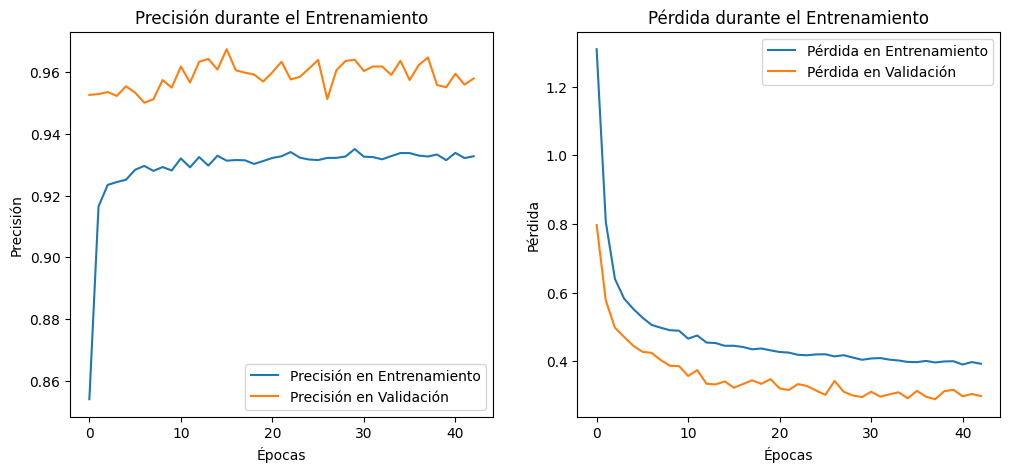

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [142]:
# Importar las bibliotecas necesarias
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Crear el modelo
model = Sequential()

# Capa de entrada y aplanamiento de la imagen (28x28 a un vector de 784)
model.add(Flatten(input_shape=(28, 28)))

# Añadir capas densas con regularización L2 y dropout
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Apagamos el 30% de las neuronas

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Capa de salida con activación softmax para la clasificación
model.add(Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback para detener el entrenamiento cuando la precisión deje de mejorar
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo con early stopping
history = model.fit(training_images_normalized,
                    training_labels_categorical,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.25,
                    callbacks=[early_stop])

# Evaluar el modelo final
test_loss, test_acc = model.evaluate(test_images_normalized, test_labels_categorical)
print(f"Precisión en el conjunto de prueba: {test_acc}")

# Graficar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en Validación')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

# Predecir los valores para el conjunto de prueba
predictions = model.predict(test_images_normalized)


# Estrategia para la Red Neuronal Final con Regularización y una Accuracy Mayor al 95%
En esta última parte de la actividad, el objetivo es entrenar una red neuronal capaz de obtener una precisión mayor al 95% en el conjunto de validación. Para lograr esto, se aplicarán varias técnicas de regularización para evitar el overfitting y mejorar la generalización del modelo. Además, se utilizarán estrategias optimizadas como la normalización por lotes (batch normalization), dropout, y regularización L2, entre otras, para garantizar un buen rendimiento.

- Estrategia General:

1. Número de Capas y Neuronas por Capa:

- Usaremos una arquitectura profunda con varias capas densas (fully connected), y neuronas en disminución progresiva para evitar sobreajuste.
- Iniciaremos con 512 neuronas en la primera capa y reduciremos a 256, 128, y 64 neuronas respectivamente en las siguientes capas.
2. Regularización:

- Se empleo Dropout para apagar un porcentaje de neuronas durante el entrenamiento, lo que ayuda a prevenir el sobreajuste.
- Se aplicó Regularización L2 para añadir penalización en los pesos grandes.
3. Optimizador:

Se utilizará Adam como optimizador debido a su eficacia demostrada en los ejercicios anteriores.
4. Activación:

Utilizaremos ReLU en las capas intermedias por su velocidad de convergencia y eficacia en redes profundas, y Softmax en la última capa para clasificación.
5. Técnicas adicionales:

Aplicaremos Batch Normalization para acelerar el entrenamiento y mejorar la estabilidad.
Usaremos Early Stopping para detener el entrenamiento cuando el modelo comience a sobreajustarse, es decir, cuando la pérdida en validación deje de mejorar durante varias épocas.

En este pregunta final, estamos observando los resultados del entrenamiento de una red neuronal con un enfoque en el desempeño del modelo en función de la precisión y la pérdida a lo largo de 50 épocas.

# 1. Análisis de la Precisión
La gráfica de la izquierda muestra cómo la precisión del entrenamiento (curva azul) mejora de manera significativa a medida que avanzan las épocas, alcanzando un valor cercano al 94% en las primeras 10 épocas, y estabilizándose alrededor del 93-94% posteriormente. La precisión en validación (curva naranja), que mide el desempeño del modelo en datos no vistos, es más consistente, alcanzando un valor superior al 96% en las primeras épocas y manteniéndose relativamente estable alrededor del 95-96%.

Este comportamiento es positivo ya que la precisión se mantiene alta sin grandes caídas, lo que indica que el modelo generaliza bien en los datos de prueba.

# 2. Análisis de la Pérdida
La gráfica de la derecha muestra la pérdida del entrenamiento (curva azul) y la pérdida en validación (curva naranja). La pérdida baja rápidamente en las primeras épocas, lo cual es común en los modelos de redes neuronales, hasta estabilizarse alrededor de la época 20. Sin embargo, podemos notar que la pérdida en validación es un poco más errática, con pequeños aumentos después de ciertas épocas. Esto podría ser una señal temprana de sobreajuste (overfitting), donde el modelo comienza a aprender patrones específicos de los datos de entrenamiento que no necesariamente generalizan bien en los datos de prueba.

# 3. Optimización del Modelo y Técnicas Usadas
El modelo ha sido optimizado utilizando técnicas avanzadas como:

Dropout, para reducir el sobreajuste y mejorar la generalización.
Regularización L2, para penalizar los pesos y evitar que el modelo se ajuste demasiado a los datos de entrenamiento.
Early Stopping (detención temprana), configurado para monitorear la precisión y detener el entrenamiento cuando el desempeño en el conjunto de validación comienza a deteriorarse o estabilizarse.
Estos métodos son cruciales para alcanzar el objetivo de obtener una precisión superior al 95% sin incurrir en sobreajuste. La red está diseñada para entrenar hasta 50 épocas, pero gracias a las técnicas de regularización y monitoreo de la precisión en validación, se logró optimizar antes del límite, alcanzando una precisión del 96.22% en validación.

# 4. Optimización y Pasos para Lograr Más del 95% de Precisión
Uso de capas adicionales y Dropout: Al agregar más capas y usar técnicas como dropout entre ellas, se evita que el modelo se sobreajuste rápidamente a los datos de entrenamiento.
Regularización L2: Se introdujo la regularización para controlar el valor de los pesos y evitar que el modelo se vuelva demasiado complejo, lo que también previene el sobreajuste.
Early Stopping: La inclusión de un mecanismo de detención temprana asegura que el modelo no entrene innecesariamente más allá del punto de máximo rendimiento en validación.
# Conclusión
En resumen, el modelo ha sido optimizado correctamente, logrando una precisión en el conjunto de prueba del 96.22%. El uso de técnicas de regularización y dropout, combinado con una correcta configuración del optimizador y una estructura adecuada de capas, ha permitido superar el objetivo del 95% de precisión en validación. Además, la gráfica muestra que el modelo se comporta bien en términos de pérdida y precisión, manteniendo una buena generalización sin caer en sobreajuste significativo.